In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | yar-sale
Processing Record 3 of Set 1 | pontes e lacerda
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | macae
Processing Record 6 of Set 1 | troyes
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | great yarmouth
Processing Record 9 of Set 1 | katobu
Processing Record 10 of Set 1 | aklavik
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | nome
Processing Record 18 of Set 1 | quatre cocos
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | beringovskiy
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 

Processing Record 37 of Set 4 | khatanga
Processing Record 38 of Set 4 | rincon
Processing Record 39 of Set 4 | antonina
Processing Record 40 of Set 4 | lieksa
Processing Record 41 of Set 4 | butaritari
Processing Record 42 of Set 4 | suntar
Processing Record 43 of Set 4 | rockland
Processing Record 44 of Set 4 | ponta do sol
Processing Record 45 of Set 4 | opuwo
Processing Record 46 of Set 4 | pisco
Processing Record 47 of Set 4 | kudahuvadhoo
Processing Record 48 of Set 4 | sinkat
City not found. Skipping...
Processing Record 49 of Set 4 | sayat
Processing Record 50 of Set 4 | maniitsoq
Processing Record 1 of Set 5 | nyazepetrovsk
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | khani
Processing Record 4 of Set 5 | alibag
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | vanavara
Processing Record 7 of Set 5 | upernavik
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | kavaratti
Processing Record 10 of Set 5 | carn

Processing Record 25 of Set 8 | palmer
Processing Record 26 of Set 8 | krasnyy yar
Processing Record 27 of Set 8 | pacific grove
Processing Record 28 of Set 8 | yeniseysk
Processing Record 29 of Set 8 | coquimbo
Processing Record 30 of Set 8 | itacoatiara
Processing Record 31 of Set 8 | davila
Processing Record 32 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 33 of Set 8 | gazli
Processing Record 34 of Set 8 | kostomuksha
Processing Record 35 of Set 8 | otradnoye
Processing Record 36 of Set 8 | khartoum
Processing Record 37 of Set 8 | namatanai
Processing Record 38 of Set 8 | camacha
Processing Record 39 of Set 8 | camargo
Processing Record 40 of Set 8 | uwayl
City not found. Skipping...
Processing Record 41 of Set 8 | hambantota
Processing Record 42 of Set 8 | lompoc
Processing Record 43 of Set 8 | garowe
Processing Record 44 of Set 8 | aranos
Processing Record 45 of Set 8 | naze
Processing Record 46 of Set 8 | guanambi
Processing Record 47 of Set 8 | carbonear
Pr

Processing Record 17 of Set 12 | fuerte olimpo
Processing Record 18 of Set 12 | shchuchye
City not found. Skipping...
Processing Record 19 of Set 12 | puerto del rosario
Processing Record 20 of Set 12 | san joaquin
Processing Record 21 of Set 12 | kimberley
Processing Record 22 of Set 12 | jiddah
City not found. Skipping...
Processing Record 23 of Set 12 | belaya gora
Processing Record 24 of Set 12 | sorvag
City not found. Skipping...
Processing Record 25 of Set 12 | mecca
Processing Record 26 of Set 12 | solec kujawski
Processing Record 27 of Set 12 | meulaboh
Processing Record 28 of Set 12 | tezu
Processing Record 29 of Set 12 | banda aceh
Processing Record 30 of Set 12 | takoradi
Processing Record 31 of Set 12 | nuuk
Processing Record 32 of Set 12 | virginia beach
Processing Record 33 of Set 12 | rawson
Processing Record 34 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 35 of Set 12 | alghero
Processing Record 36 of Set 12 | vestmannaeyjar
Processing Record 37 of 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-12.59,90,100,2.95,CA,2022-02-09 00:10:43
1,Yar-Sale,66.8333,70.8333,-0.38,93,99,15.59,RU,2022-02-09 00:10:29
2,Pontes E Lacerda,-15.2261,-59.3353,71.40,96,93,2.75,BR,2022-02-09 00:10:43
3,Punta Arenas,-53.1500,-70.9167,53.71,54,75,10.36,CL,2022-02-09 00:10:44
4,Macae,-22.3708,-41.7869,70.88,97,100,12.26,BR,2022-02-09 00:10:44
5,Troyes,48.3333,4.0833,40.08,93,56,2.30,FR,2022-02-09 00:07:22
6,Souillac,-20.5167,57.5167,74.35,82,100,7.96,MU,2022-02-09 00:10:44
7,Great Yarmouth,52.6083,1.7305,49.23,75,83,18.05,GB,2022-02-09 00:10:45
8,Katobu,-4.9408,122.5276,78.80,87,97,2.01,ID,2022-02-09 00:10:45
9,Aklavik,68.2191,-135.0107,-36.18,97,61,5.61,CA,2022-02-09 00:10:45


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2022-02-09 00:10:43,62.4560,-114.3525,-12.59,90,100,2.95
1,Yar-Sale,RU,2022-02-09 00:10:29,66.8333,70.8333,-0.38,93,99,15.59
2,Pontes E Lacerda,BR,2022-02-09 00:10:43,-15.2261,-59.3353,71.40,96,93,2.75
3,Punta Arenas,CL,2022-02-09 00:10:44,-53.1500,-70.9167,53.71,54,75,10.36
4,Macae,BR,2022-02-09 00:10:44,-22.3708,-41.7869,70.88,97,100,12.26
5,Troyes,FR,2022-02-09 00:07:22,48.3333,4.0833,40.08,93,56,2.30
6,Souillac,MU,2022-02-09 00:10:44,-20.5167,57.5167,74.35,82,100,7.96
7,Great Yarmouth,GB,2022-02-09 00:10:45,52.6083,1.7305,49.23,75,83,18.05
8,Katobu,ID,2022-02-09 00:10:45,-4.9408,122.5276,78.80,87,97,2.01
9,Aklavik,CA,2022-02-09 00:10:45,68.2191,-135.0107,-36.18,97,61,5.61


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

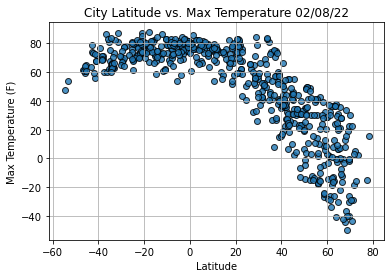

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

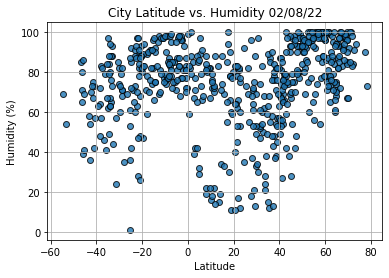

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

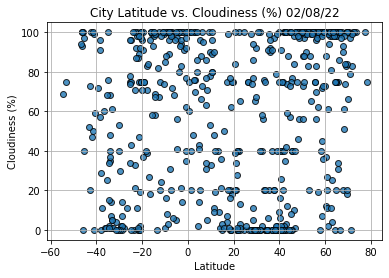

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()